In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [3]:
#Question 1

df = pd.read_csv('Titanic.csv')
df.head()
df.info()
df = df.loc[:,~df.columns.isin(['Name','Ticket','Cabin'])]
df = df.dropna(axis=0)
df.head()
df.info()

df.head()

x = df.drop('Survived',axis=1).copy()
y = df['Survived'].copy()
x.head()
y.unique()

x_encoded = pd.get_dummies(x,columns=['Sex','Embarked'])
x_train, x_test, y_train, y_test = train_test_split(x_encoded,y,test_size=0.2,random_state=42)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived 

[Text(0.5947779605263158, 0.9736842105263158, 'x[6] <= 0.5\ngini = 0.478\nsamples = 569\nvalue = [344, 225]'),
 Text(0.32113486842105265, 0.9210526315789473, 'x[1] <= 1.5\ngini = 0.309\nsamples = 361\nvalue = [292, 69]'),
 Text(0.18914473684210525, 0.868421052631579, 'x[0] <= 564.5\ngini = 0.483\nsamples = 81\nvalue = [48, 33]'),
 Text(0.06578947368421052, 0.8157894736842105, 'x[2] <= 53.0\ngini = 0.405\nsamples = 46\nvalue = [33, 13]'),
 Text(0.05263157894736842, 0.7631578947368421, 'x[5] <= 27.135\ngini = 0.478\nsamples = 33\nvalue = [20, 13]'),
 Text(0.02631578947368421, 0.7105263157894737, 'x[5] <= 13.144\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.013157894736842105, 0.6578947368421053, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.039473684210526314, 0.6578947368421053, 'x[0] <= 525.0\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.02631578947368421, 0.6052631578947368, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.05263157894736842, 0.6052631578947368

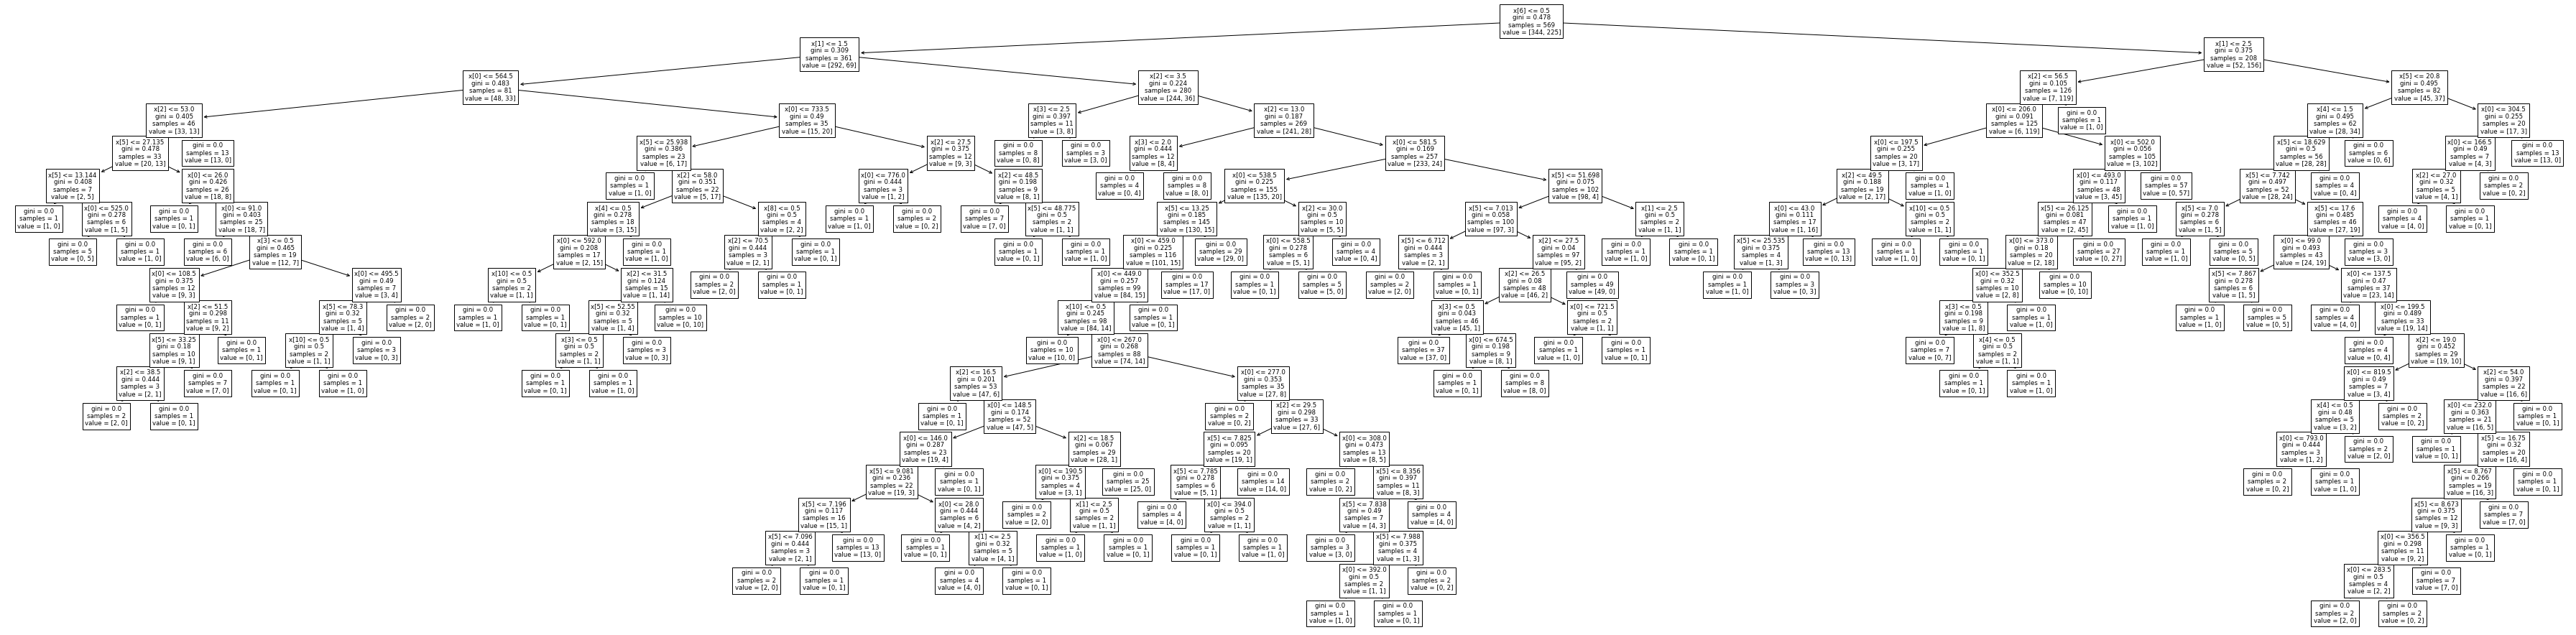

In [6]:
#question 2

model = DecisionTreeClassifier(random_state = 42)
model.fit(x_train,y_train)
plt.figure(figsize=(64,16))
plot_tree(model)



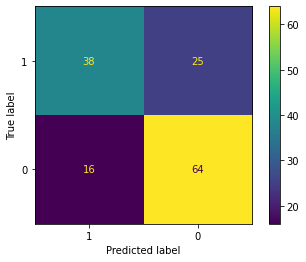

In [7]:
model.get_params()
predictions = model.predict(x_test)
predictions

cm = confusion_matrix(y_test, predictions, labels=[1,0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[1,0])
disp.plot()
plt.show()



In [8]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(tp,tn,fp,fn)
sensitivity = tp/(tp+fp)
print(sensitivity)
specificity = tn/(tn+fn)
print(specificity)
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(accuracy)

38 64 16 25
0.7037037037037037
0.7191011235955056
0.7132867132867133


In [9]:
#Question 3

path = model.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]
model_dts = []

In [10]:
for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    model.fit(x_train,y_train)
    model_dts.append(model)
    
train_scores = [model.score(x_train,y_train) for model in model_dts]
test_scores = [model.score(x_test,y_test) for model in model_dts]

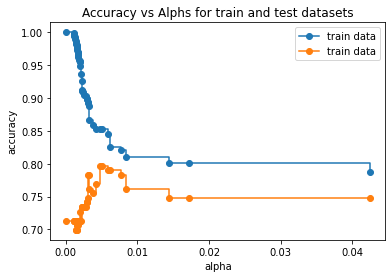

In [11]:
fig , ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Alphs for train and test datasets")
ax.plot(ccp_alphas,train_scores,marker='o',label="train data",drawstyle="steps-post")
ax.plot(ccp_alphas,test_scores,marker='o',label="train data",drawstyle="steps-post")
ax.legend()
plt.show()

In [12]:
#alpha = 0.007, by eye-balling!

<AxesSubplot:xlabel='alpha'>

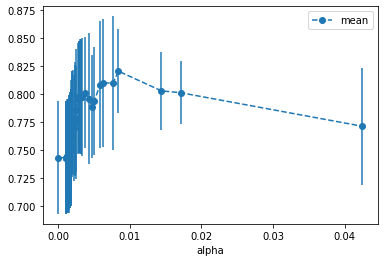

In [13]:
alphas = []

for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=42,ccp_alpha=ccp_alpha)
    scores = cross_val_score(model,x_train,y_train,cv=10)
    alphas.append([ccp_alpha,np.mean(scores),np.std(scores)])

alpha_results = pd.DataFrame(alphas,columns=['alpha','mean','std'])
alpha_results.plot(x='alpha',y='mean',yerr='std',marker='o',linestyle='--')

In [14]:
best_cp=alpha_results[(alpha_results['alpha']>0.008) & (alpha_results['alpha']<0.01)]['alpha']
best_cp = float(best_cp)
best_cp

0.008435990647110952

[Text(0.5, 0.875, 'x[6] <= 0.5\ngini = 0.478\nsamples = 569\nvalue = [344, 225]'),
 Text(0.25, 0.625, 'x[1] <= 1.5\ngini = 0.309\nsamples = 361\nvalue = [292, 69]'),
 Text(0.125, 0.375, 'gini = 0.483\nsamples = 81\nvalue = [48, 33]'),
 Text(0.375, 0.375, 'x[2] <= 3.5\ngini = 0.224\nsamples = 280\nvalue = [244, 36]'),
 Text(0.25, 0.125, 'gini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(0.5, 0.125, 'gini = 0.187\nsamples = 269\nvalue = [241, 28]'),
 Text(0.75, 0.625, 'x[1] <= 2.5\ngini = 0.375\nsamples = 208\nvalue = [52, 156]'),
 Text(0.625, 0.375, 'gini = 0.105\nsamples = 126\nvalue = [7, 119]'),
 Text(0.875, 0.375, 'gini = 0.495\nsamples = 82\nvalue = [45, 37]')]

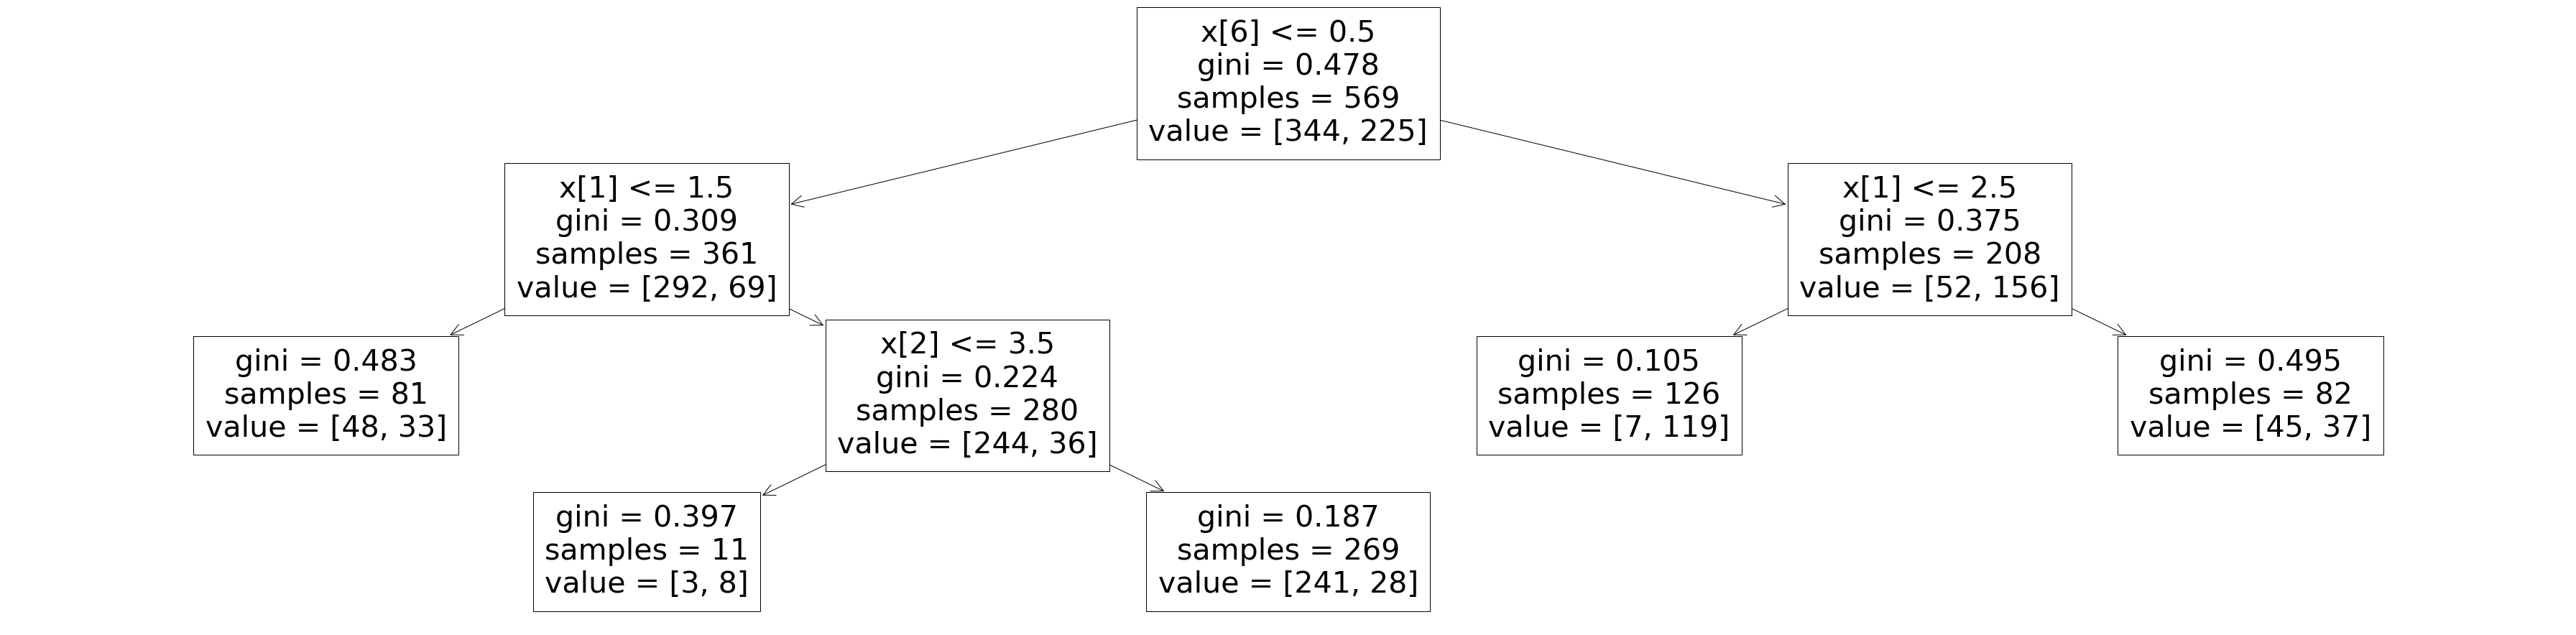

In [19]:
plt.figure(figsize=(64,16))
plot_tree(model_pruned)

In [15]:
model_pruned = DecisionTreeClassifier(random_state=42,ccp_alpha=best_cp)
model_pruned = model_pruned.fit(x_train,y_train)

In [16]:
predictions_pruned = model_pruned.predict(x_test)
predictions_pruned

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

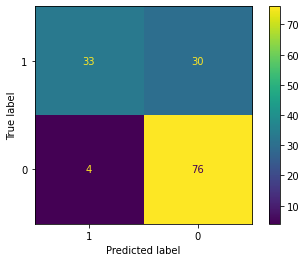

In [17]:
#Question 4

cm_pruned = confusion_matrix(y_test,predictions_pruned,labels=[1,0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_pruned,display_labels=[1,0])
disp.plot()

In [18]:
accuracy_score(y_test,predictions_pruned)
tn, fp, fn, tp = confusion_matrix(y_test, predictions_pruned).ravel()
print(tp,tn,fp,fn)
sensitivity = tp/(tp+fp)
print(sensitivity)
specificity = tn/(tn+fn)
print(specificity)
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(accuracy)

33 76 4 30
0.8918918918918919
0.7169811320754716
0.7622377622377622
